In [1]:
import pandas as pd

In [5]:
# Can read from html, csv, excel, sql ..

## Reading Excel 

In [3]:
df=pd.read_excel('AmesHousing.xls')

In [13]:
df.head(2) # also, tail

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000


In [14]:
df.tail(2)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2929,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


In [15]:
df.info() # number of rows and columns, 
            #the number of non-null values, 
                #what type of data is in each column, and 
                    #how much memory your DataFrame is using

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

In [16]:
df.shape

(2930, 82)

In [12]:
df = df.drop_duplicates()  ## drop duplicates

In [18]:
df.columns # print names of columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [20]:
# alternate way to access column names
i=0
for col in df:
    print(col)
    i+=1
    if i>2: break

Order
PID
MS SubClass


In [21]:
# Renaming selective columns
df.rename(columns={
        'Order': 'order', 
        'PID': 'pid'
    }, inplace=True)

In [26]:
## checking for null values, isnull() returns a dataframe
df.isnull().head()  

,order,pid,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False


In [32]:
# using aggregate function for summing the row values
df.isnull().sum()

order               0
pid                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [35]:
null_vals=dict(df.isnull().sum())

In [37]:
null_vals

{'order': 0,
 'pid': 0,
 'MS SubClass': 0,
 'MS Zoning': 0,
 'Lot Frontage': 490,
 'Lot Area': 0,
 'Street': 0,
 'Alley': 2732,
 'Lot Shape': 0,
 'Land Contour': 0,
 'Utilities': 0,
 'Lot Config': 0,
 'Land Slope': 0,
 'Neighborhood': 0,
 'Condition 1': 0,
 'Condition 2': 0,
 'Bldg Type': 0,
 'House Style': 0,
 'Overall Qual': 0,
 'Overall Cond': 0,
 'Year Built': 0,
 'Year Remod/Add': 0,
 'Roof Style': 0,
 'Roof Matl': 0,
 'Exterior 1st': 0,
 'Exterior 2nd': 0,
 'Mas Vnr Type': 23,
 'Mas Vnr Area': 23,
 'Exter Qual': 0,
 'Exter Cond': 0,
 'Foundation': 0,
 'Bsmt Qual': 80,
 'Bsmt Cond': 80,
 'Bsmt Exposure': 83,
 'BsmtFin Type 1': 80,
 'BsmtFin SF 1': 1,
 'BsmtFin Type 2': 81,
 'BsmtFin SF 2': 1,
 'Bsmt Unf SF': 1,
 'Total Bsmt SF': 1,
 'Heating': 0,
 'Heating QC': 0,
 'Central Air': 0,
 'Electrical': 1,
 '1st Flr SF': 0,
 '2nd Flr SF': 0,
 'Low Qual Fin SF': 0,
 'Gr Liv Area': 0,
 'Bsmt Full Bath': 2,
 'Bsmt Half Bath': 2,
 'Full Bath': 0,
 'Half Bath': 0,
 'Bedroom AbvGr': 0,
 'Kitc

In [38]:
temp_df=df

In [46]:
# removing rows with atleast one null value. Use axis=1 for removing columns with atleast one non null value
temp_df=temp_df.dropna(axis=0)

In [47]:
temp_df.isnull().sum()

order             0
pid               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 82, dtype: int64

In [53]:
# Series 
lot_frontage=df['Lot Frontage']

In [52]:
lot_frontage

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2930, dtype: float64

In [62]:
# working with series : mean, median, mode, describe Similar to working with the whole dataframe but now with a single col
lot_frontage.mean()

69.22459016393442

In [63]:
lot_frontage.fillna(lot_frontage.mean(), inplace=True)

In [67]:
lot_frontage.isnull().sum()

0

In [70]:
#Finding unique values in a column
df['Sale Condition'].value_counts()

Normal     2413
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: Sale Condition, dtype: int64

In [77]:
## corelation between continuous variable columns
df.corr().head(5)

,order,pid,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
order,1.000000,0.173593,0.011797,-0.006461,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
pid,0.173593,1.000000,-0.001281,-0.088419,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.392019,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.006461,-0.088419,-0.392019,1.000000,0.365503,0.198900,-0.067383,0.115688,0.085744,0.204103,...,0.104632,0.150426,0.011685,0.025501,0.070084,0.160698,0.035926,0.010177,-0.006921,0.340751
Lot Area,0.031354,0.034868,-0.204613,0.365503,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549


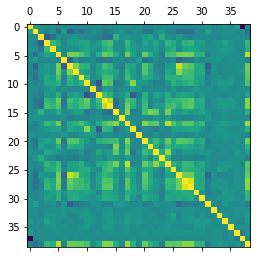

In [76]:
# plotting the correlation between columns
import matplotlib.pyplot as plt
plt.matshow(df.corr())
# plt.show()

In [79]:
# Selecting columns as series 
type(df['Sale Condition'])

pandas.core.series.Series

In [81]:
# Selecting columns as dataframe 
type(df[['Sale Condition']])

pandas.core.frame.DataFrame

In [85]:
# iloc: locates the row by numerical index
x=df.iloc[1]
print(type(x))

<class 'pandas.core.series.Series'>


In [86]:
x

order                     2
pid               526350040
MS SubClass              20
MS Zoning                RH
Lot Frontage             80
                    ...    
Mo Sold                   6
Yr Sold                2010
Sale Type               WD 
Sale Condition       Normal
SalePrice            105000
Name: 1, Length: 82, dtype: object

In [87]:
# iloc: locates the row by index
x=df.loc[1]

In [88]:
x

order                     2
pid               526350040
MS SubClass              20
MS Zoning                RH
Lot Frontage             80
                    ...    
Mo Sold                   6
Yr Sold                2010
Sale Type               WD 
Sale Condition       Normal
SalePrice            105000
Name: 1, Length: 82, dtype: object

In [114]:
# setting the index of the dataframe to year uilt
df.set_index(['Year Built'], inplace=True)

In [115]:
df.index

Int64Index([1960, 1961, 1958, 1968, 1997, 1998, 2001, 1992, 1995, 1999,
            ...
            1970, 1976, 1976, 1977, 1960, 1984, 1983, 1992, 1974, 1993],
           dtype='int64', name='Year Built', length=2930)

In [119]:
# using loc to find all the houses built in 1960
df.loc[1961].head(5)

,order,pid,MS SubClass,MS Zoning,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Year Built,,,,,,,,,,,,,,,,,,,,,
1961,2,526350040,20,RH,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
1961,85,532354090,85,RL,11782,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,6,2010,WD,Normal,148000
1961,557,532354160,20,RL,8499,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,141000
1961,558,532354230,20,RL,9079,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,122000
1961,561,532377130,20,RL,10000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,Shed,400,3,2009,WD,Normal,131400


In [127]:
df[df['Mo Sold'] == 6].head()

,order,pid,MS SubClass,MS Zoning,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Year Built,,,,,,,,,,,,,,,,,,,,,
1961,2,526350040,20,RH,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
1958,3,526351010,20,RL,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
1998,6,527105030,60,RL,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
1999,10,527162130,60,RL,7500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000
1985,15,527182190,120,RL,6820,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,212000


In [128]:
# selecting using logical operations &,|,..

df[(df['Mo Sold'] == 6) & (df['Lot Shape']=='IR1')].head()

,order,pid,MS SubClass,MS Zoning,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Year Built,,,,,,,,,,,,,,,,,,,,,
1958,3,526351010,20,RL,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
1998,6,527105030,60,RL,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
1985,15,527182190,120,RL,6820,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,212000
1988,17,527225035,50,RL,12134,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,164000
1999,29,527427230,120,RH,5858,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,184000
